# 2. The Mathematical Building Blocks of Neural Networks

### 2.1 A First Look at a Neural Network (solving MNIST using Keras)

Let’s look at a concrete example of a neural network that uses the Python library Keras to learn to classify handwritten digits.

In [36]:
# 2.1 Loading the MNIST dataset in Keras
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images and train_labels form the training set, the data that the model will learn from. The model will then be tested on the test set, test_images and test_labels.

In [37]:
# Let's look at the training data:
print("Train images shape =", train_images.shape)
print("Length of train labels =", train_labels)
print("The train labels:", train_labels)

# Here's the test data:
print("The shape of the test images =",test_images.shape)
print("The length of the test labels =", len(test_labels))
print("The test labels: ", test_labels)

Train images shape = (60000, 28, 28)
Length of train labels = [5 0 4 ... 5 6 8]
The train labels: [5 0 4 ... 5 6 8]
The shape of the test images = (10000, 28, 28)
The length of the test labels = 10000
The test labels:  [7 2 1 ... 4 5 6]


### The workflow will be as follows: First, we’ll feed the neural network the training data, train_images and train_labels. The network will then learn to associate images and labels. Finally, we’ll ask the network to produce predictions for test_images, and we’ll verify whether these predictions match the labels from test_labels.

In [38]:
# 2.2 The network architecture
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

The core building block of neural networks is the layer. You can think of a layer as a filter for data: some data goes in, and it comes out in a more useful form. Specifically, layers extract representations out of the data fed into them—hopefully, representations that are more meaningful for the problem at hand.<br><br>
To make the model ready for training, we need to pick three more things, as part of the compilation step:<br>
<br>• An optimizer—The mechanism through which the model will update itself based on the training data it sees, so as to improve its performance.<br><br>
<br>• A loss function—How the model will be able to measure its performance on the training data, and thus how it will be able to steer itself in the right direction.<br><br>
<br>• Metrics to monitor during training and testing—Here, we’ll only care about accuracy (the fraction of the images that were correctly classified).

In [39]:
# 2.3 The compliation step
model.compile(optimizer="rmsprop",
              loss= "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

Before training, we’ll preprocess the data by reshaping it into the shape the model expects and scaling it so that all values are in the [0, 1] interval.

In [40]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype("float32") / 255

We’re now ready to train the model, which in Keras is done via a call to the model’s fit() method—we fit the model to its training data:

In [41]:
model.fit(train_images, train_labels, epochs = 5, batch_size = 128)

Epoch 1/5
 10/469 [..............................] - ETA: 2s - loss: 1.3251 - accuracy: 0.5883  

2021-09-04 12:58:33.155491: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 3s 7ms/step - loss: 0.2570 - accuracy: 0.9247

Now that we have a trained model, you can use it to predict class probabilities for new digits—images that weren’t part of the training data, like those from the test set:

In [42]:
# 2.6 Using the model to make predictions
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0] # the highest score is at index 7

2021-09-04 12:58:47.879263: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([2.4609064e-09, 1.0167636e-10, 1.4017910e-06, 8.6295047e-05,
       8.8770088e-13, 1.1054731e-08, 5.6696337e-14, 9.9991059e-01,
       7.9632947e-08, 1.6257959e-06], dtype=float32)

In [43]:
# Checking to see if the first digit is a 7:
predictions[0].argmax()
predictions[0][7]

0.9999106

We can check that the test label agrees:

In [44]:
test_labels[0]

7

On average, how good is our model at classifying such never-seen-before digits? Let’s check by computing average accuracy over the entire test set.

In [45]:
test_loss, test_acc =model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

 12/313 [>.............................] - ETA: 1s - loss: 0.0558 - accuracy: 0.9844 

2021-09-04 12:58:47.975070: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 4ms/step - loss: 0.0689 - accuracy: 0.9794

## 2.2 Data Representations for Neural Networks

### 2.21 Scalars (rank-0 tensors)
A tensor that contains only one number is called a scalar (or scalar tensor, or rank-0 tensor, or 0D tensor).

In [46]:
import numpy as np
x = np.array(12)
print("x =",x)
print("The dimensions of x =",x.ndim) # dimension = 0

x = 12
The dimensions of x = 0


### 2.2.2 Vectors (rank-1 tensors)
An array of numbers is called a vector, or rank-1 tensor, or 1D tensor. A rank-1 tensor is said to have exactly one axis.

In [47]:
x = np.array([12, 3, 6, 14, 7])
print("x = ", x)
print("The dimensions of x = ",x.ndim)

x =  [12  3  6 14  7]
The dimensions of x =  1


A 5D vector has only one axis and has five dimensions along its axis, whereas a 5D tensor has five axes (and may have any number of dimensions along each axis).

### 2.2.3 Matrices (rank-2 tensors)

An array of vectors is a matrix, or rank-2 tensor, or 2D tensor. A matrix has two axes (often referred to rows and columns).

In [48]:
x = np.array([[5, 78, 2, 34, 0],
             [6, 79, 3, 24, 1],
             [7, 80, 4, 36, 2]])
print("x =", x)
print("The dimensions of x =", x.ndim)

x = [[ 5 78  2 34  0]
 [ 6 79  3 24  1]
 [ 7 80  4 36  2]]
The dimensions of x = 2


### 2.2.4 Rank-3 tensors and higher–rank tensors

If you pack such matrices in a new array, you obtain a rank-3 tensor (or 3D tensor), which you can visually interpret as a cube of numbers.

In [49]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]],
             [[5, 78, 3, 35, 1],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]]])
print("x = ", x)
print("The dimensions of x = ", x.ndim)



x =  [[[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]

 [[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]

 [[ 5 78  3 35  1]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]]
The dimensions of x =  3


### 2.2.5 Key attributes of tensors

A tensor is defined by three key attributes:

• <i>Number of axes (rank)</i>—For instance, a rank-3 tensor has three axes, and a matrix has two axes. This is also called the tensor’s ndim in Python libraries such as NumPy or TensorFlow.<br>
• <i>Shape</i>—This is a tuple of integers that describes how many dimensions the tensor has along each axis. For instance, the previous matrix example has shape (3, 5), and the rank-3 tensor example has shape (3, 3, 5). A vector has a shape with a single element, such as (5,), whereas a scalar has an empty shape, ().<br>
• <i>Data type</i>(usually called dtype in Python libraries)—This is the type of the data contained in the tensor; for instance, a tensor’s type could be float16, float32, float64, uint8, and so on. In TensorFlow, you are also likely to come across string tensors.

To make this more concrete, let’s look back at the data we processed in the MNIST example. First, we load the MNIST dataset:

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Next, we display the number of axes of the tensor train_images, the ndim attribute:

In [ ]:
train_images.ndim

Here is the shape:

In [ ]:
print(train_images.shape)

And this is the data type, the dtype attribute:

In [ ]:
print(train_images.dtype)

So what we have here is a rank-3 tensor of 8-bit integers. More precisely, it’s an array of 60,000 matrices of 28 × 28 integers. Each such matrix is a grayscale image, with coefficients between 0 and 255.

Let’s display the fourth digit in this rank-3 tensor, using the library Matplotlib (part of the standard scientific Python suite); see figure 2.2.

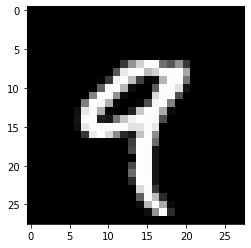

In [58]:
import matplotlib.pyplot as plt
digit = train_images[4]
digit = digit.reshape((28, 28))
plt.imshow(digit,cmap='gray')
plt.show()

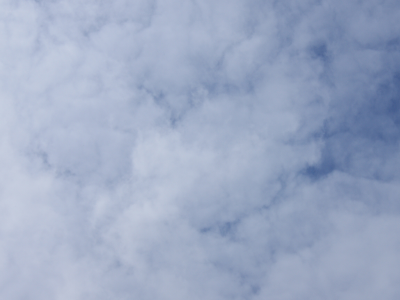

In [59]:
# How to display an image in a Jupyter notebook:
from IPython.display import Image
Image(filename='clouds.png')